In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras import utils, layers, models
from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential



# Модель - 1

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)
print("x_test original shape", x_test.shape)
print("y_test original shape", y_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
x_train original shape (60000, 28, 28)
y_train original shape (60000,)
x_test original shape (10000, 28, 28)
y_test original shape (10000,)


In [3]:
# Нормализация данных
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("x_train normalize shape", x_train.shape)
print("x_test normalize shape", x_test.shape)

x_train normalize shape (60000, 28, 28)
x_test normalize shape (10000, 28, 28)


In [4]:
# Преобразование размерности изображений
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Преобразуем из  (28, 28) в (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Преобразуем метки в категории
y_train = utils.to_categorical(y_train, 10)
y_valid = utils.to_categorical(y_valid, 10)
y_test = utils.to_categorical(y_test, 10)

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [5]:
model = models.Sequential([
      layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.3),
      layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.3),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [8]:
history = model.fit(
                    x_train,
                    y_train,
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_valid, y_valid)
                        )

Epoch 1/10
860/860 [==============================] - 17s 9ms/step - loss: 0.6107 - accuracy: 0.7747 - val_loss: 0.3784 - val_accuracy: 0.8670
Epoch 2/10
860/860 [==============================] - 5s 6ms/step - loss: 0.4178 - accuracy: 0.8475 - val_loss: 0.3263 - val_accuracy: 0.8800
Epoch 3/10
860/860 [==============================] - 4s 5ms/step - loss: 0.3753 - accuracy: 0.8624 - val_loss: 0.2992 - val_accuracy: 0.8890
Epoch 4/10
860/860 [==============================] - 4s 5ms/step - loss: 0.3524 - accuracy: 0.8715 - val_loss: 0.2878 - val_accuracy: 0.8962
Epoch 5/10
860/860 [==============================] - 5s 6ms/step - loss: 0.3289 - accuracy: 0.8798 - val_loss: 0.2748 - val_accuracy: 0.9008
Epoch 6/10
860/860 [==============================] - 4s 5ms/step - loss: 0.3145 - accuracy: 0.8842 - val_loss: 0.2664 - val_accuracy: 0.9012
Epoch 7/10
860/860 [==============================] - 5s 5ms/step - loss: 0.3039 - accuracy: 0.8893 - val_loss: 0.2502 - val_accuracy: 0.9050
Epoch

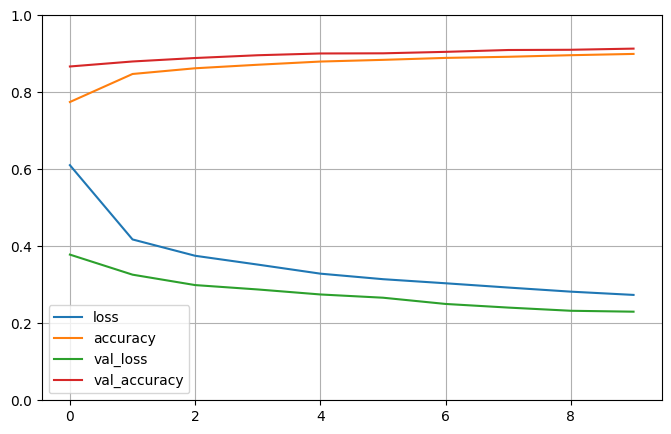

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
# Оцінка якості моделі
results = model.evaluate(x_test, y_test)
print(f'відсоток вірних відповідей - {round(results[1] * 100, 1)}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.2496 - accuracy: 0.9085
відсоток вірних відповідей - 90.9%


In [11]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

313/313 [==============================] - 1s 2ms/step


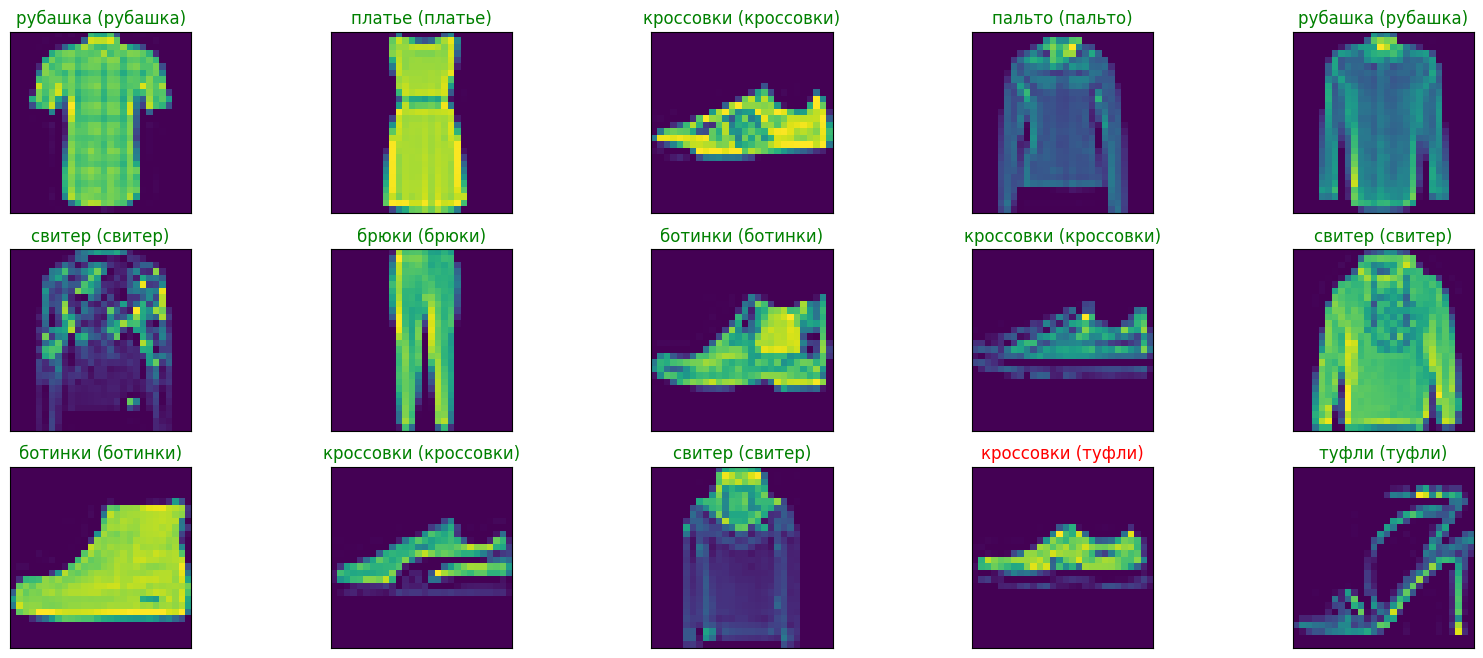

In [12]:
# візуалізація
y_hat = model.predict(x_test)



figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])

    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Висновок. При використанні згорткових нейронних мереж якість передбачення покращується. У порівнянні з попереднім домашнім завданням точність збільшилась на три відсоткових пункти, з 88% до 91%

# Модель - 2

In [16]:
# завантаження даних fashion_mnist
(x_train_2, y_train_2), (x_test_2, y_test_2) = fashion_mnist.load_data()
print("x_train_2 original shape", x_train_2.shape)
print("y_train_2 original shape", y_train_2.shape)
print("x_test_2 original shape", x_test_2.shape)
print("y_test_2 original shape", y_test_2.shape)

x_train_2 original shape (60000, 28, 28)
y_train_2 original shape (60000,)
x_test_2 original shape (10000, 28, 28)
y_test_2 original shape (10000,)


In [17]:
# Нормализация данных
x_train_2 = x_train_2.astype('float32') / 255
x_test_2 = x_test_2.astype('float32') / 255
print("x_train_2 normalize shape", x_train_2.shape)
print("x_test_2 normalize shape", x_test_2.shape)

x_train_2 normalize shape (60000, 28, 28)
x_test_2 normalize shape (10000, 28, 28)


In [18]:
# Зміна розмірності зображень
(x_train_2, x_valid_2) = x_train_2[5000:], x_train_2[:5000]
(y_train_2, y_valid_2) = y_train_2[5000:], y_train_2[:5000]

# Перетворення з розмірності  (28, 28) в (28, 28, 1)
x_train_2 = x_train_2.reshape(x_train_2.shape[0], 28, 28, 1)
x_valid_2 = x_valid_2.reshape(x_valid_2.shape[0], 28, 28, 1)
x_test_2 = x_test_2.reshape(x_test_2.shape[0], 28, 28, 1)

# Перетворення мітки у категорії
y_train_2 = utils.to_categorical(y_train_2, 10)
y_valid_2 = utils.to_categorical(y_valid_2, 10)
y_test_2 = utils.to_categorical(y_test_2, 10)

print("x_train_2 shape:", x_train_2.shape, "y_train_2 shape:", y_train_2.shape)

print(x_train_2.shape[0], 'train_2 set')
print(x_valid_2.shape[0], 'validation_2 set')
print(x_test_2.shape[0], 'test_2 set')

x_train_2 shape: (55000, 28, 28, 1) y_train_2 shape: (55000, 10)
55000 train_2 set
5000 validation_2 set
10000 test_2 set


In [47]:
model_2 = models.Sequential([
      layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),
      layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
      layers.MaxPooling2D(pool_size=2),
      # layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
      # layers.MaxPooling2D(pool_size=2),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
])

In [48]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 1568)              0         
                                                                 
 dense_16 (Dense)            (None, 256)              

In [49]:
model_2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [50]:
history_2 = model_2.fit(
                    x_train_2,
                    y_train_2,
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_valid_2, y_valid_2)
                        )

Epoch 1/10
860/860 [==============================] - 5s 5ms/step - loss: 0.4587 - accuracy: 0.8341 - val_loss: 0.3285 - val_accuracy: 0.8862
Epoch 2/10
860/860 [==============================] - 4s 5ms/step - loss: 0.3055 - accuracy: 0.8891 - val_loss: 0.2935 - val_accuracy: 0.8950
Epoch 3/10
860/860 [==============================] - 4s 4ms/step - loss: 0.2629 - accuracy: 0.9039 - val_loss: 0.2790 - val_accuracy: 0.9008
Epoch 4/10
860/860 [==============================] - 4s 4ms/step - loss: 0.2342 - accuracy: 0.9135 - val_loss: 0.2430 - val_accuracy: 0.9108
Epoch 5/10
860/860 [==============================] - 5s 5ms/step - loss: 0.2104 - accuracy: 0.9223 - val_loss: 0.2382 - val_accuracy: 0.9090
Epoch 6/10
860/860 [==============================] - 4s 5ms/step - loss: 0.1907 - accuracy: 0.9285 - val_loss: 0.2611 - val_accuracy: 0.9076
Epoch 7/10
860/860 [==============================] - 4s 4ms/step - loss: 0.1720 - accuracy: 0.9360 - val_loss: 0.2262 - val_accuracy: 0.9176
Epoch 

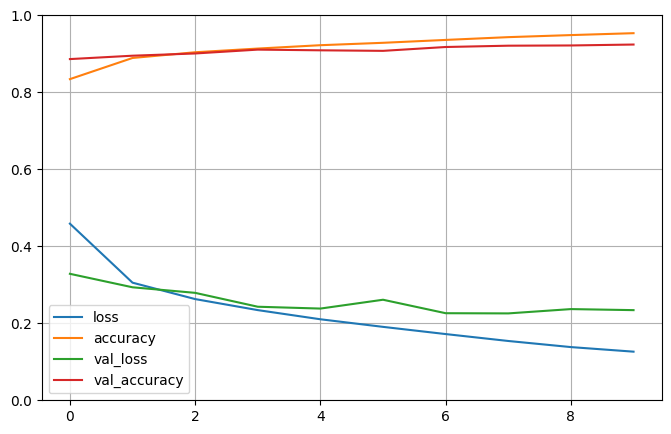

In [52]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [54]:
# Оцінка якості моделі
results_2 = model_2.evaluate(x_test_2, y_test_2)
print(f'відсоток вірних відповідей - {round(results_2[1] * 100, 1)}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.2595 - accuracy: 0.9132
відсоток вірних відповідей - 91.3%


313/313 [==============================] - 1s 2ms/step


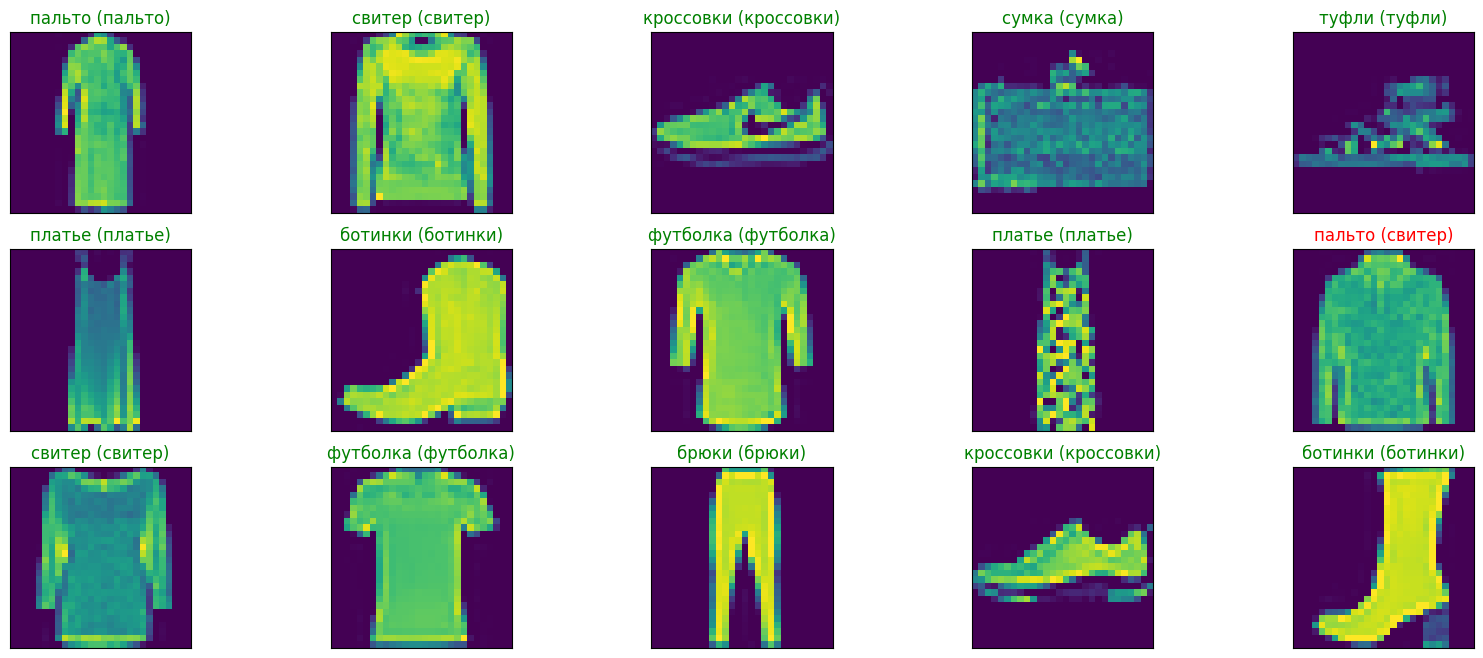

In [56]:
# візуалізація
y_hat_2 = model_2.predict(x_test_2)

figure_2 = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test_2.shape[0], size=15, replace=False)):
    ax = figure_2.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(x_test_2[index]))
    predict_index = np.argmax(y_hat_2[index])
    true_index = np.argmax(y_test_2[index])

    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Висновок. Результат подібний до першої моделі, в порівнянні із звичайною моделлю нейронної мережі, результативність вища, але дана модель має схильність до перенавчання.

# Модель - 3

In [57]:
# завантаження даних fashion_mnist
(x_train_3, y_train_3), (x_test_3, y_test_3) = fashion_mnist.load_data()
print("x_train_3 original shape", x_train_3.shape)
print("y_train_3 original shape", y_train_3.shape)
print("x_test_3 original shape", x_test_3.shape)
print("y_test_3 original shape", y_test_3.shape)

x_train_3 original shape (60000, 28, 28)
y_train_3 original shape (60000,)
x_test_3 original shape (10000, 28, 28)
y_test_3 original shape (10000,)


In [58]:
# Нормализация данных
x_train_3 = x_train_3.astype('float32') / 255
x_test_3 = x_test_3.astype('float32') / 255
print("x_train_3 normalize shape", x_train_3.shape)
print("x_test_3 normalize shape", x_test_3.shape)

x_train_3 normalize shape (60000, 28, 28)
x_test_3 normalize shape (10000, 28, 28)


In [59]:
# Зміна розмірності зображень
(x_train_3, x_valid_3) = x_train_3[5000:], x_train_3[:5000]
(y_train_3, y_valid_3) = y_train_3[5000:], y_train_3[:5000]

# Перетворення з розмірності  (28, 28) в (28, 28, 1)
x_train_3 = x_train_3.reshape(x_train_3.shape[0], 28, 28, 1)
x_valid_3 = x_valid_3.reshape(x_valid_3.shape[0], 28, 28, 1)
x_test_3 = x_test_3.reshape(x_test_3.shape[0], 28, 28, 1)

# Перетворення мітки у категорії
y_train_3 = utils.to_categorical(y_train_3, 10)
y_valid_3 = utils.to_categorical(y_valid_3, 10)
y_test_3 = utils.to_categorical(y_test_3, 10)

print("x_train_3 shape:", x_train_3.shape, "y_train_3 shape:", y_train_3.shape)

print(x_train_3.shape[0], 'train_3 set')
print(x_valid_3.shape[0], 'validation_3 set')
print(x_test_3.shape[0], 'test_3 set')

x_train_3 shape: (55000, 28, 28, 1) y_train_3 shape: (55000, 10)
55000 train_3 set
5000 validation_3 set
10000 test_3 set


In [70]:
model_3 = models.Sequential([
      layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.5),
      layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.5),
      layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.5),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
])

In [71]:
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 128)       

In [72]:
model_3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [73]:
history_3 = model_3.fit(
                    x_train_3,
                    y_train_3,
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_valid_3, y_valid_3)
                        )

Epoch 1/10
860/860 [==============================] - 9s 8ms/step - loss: 0.5932 - accuracy: 0.7798 - val_loss: 0.3547 - val_accuracy: 0.8784
Epoch 2/10
860/860 [==============================] - 6s 7ms/step - loss: 0.3839 - accuracy: 0.8574 - val_loss: 0.2899 - val_accuracy: 0.9004
Epoch 3/10
860/860 [==============================] - 6s 7ms/step - loss: 0.3328 - accuracy: 0.8772 - val_loss: 0.2718 - val_accuracy: 0.8984
Epoch 4/10
860/860 [==============================] - 7s 8ms/step - loss: 0.3096 - accuracy: 0.8850 - val_loss: 0.2558 - val_accuracy: 0.9076
Epoch 5/10
860/860 [==============================] - 6s 7ms/step - loss: 0.2946 - accuracy: 0.8895 - val_loss: 0.2344 - val_accuracy: 0.9094
Epoch 6/10
860/860 [==============================] - 6s 8ms/step - loss: 0.2814 - accuracy: 0.8953 - val_loss: 0.2320 - val_accuracy: 0.9176
Epoch 7/10
860/860 [==============================] - 6s 7ms/step - loss: 0.2725 - accuracy: 0.8991 - val_loss: 0.2282 - val_accuracy: 0.9186
Epoch 

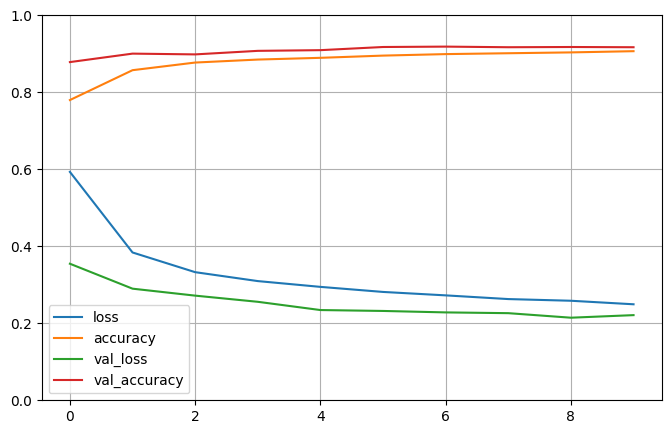

In [74]:
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [75]:
# Оцінка якості моделі
results_3 = model_3.evaluate(x_test_3, y_test_3)
print(f'відсоток вірних відповідей - {round(results_3[1] * 100, 1)}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.2439 - accuracy: 0.9104
відсоток вірних відповідей - 91.0%


313/313 [==============================] - 1s 2ms/step


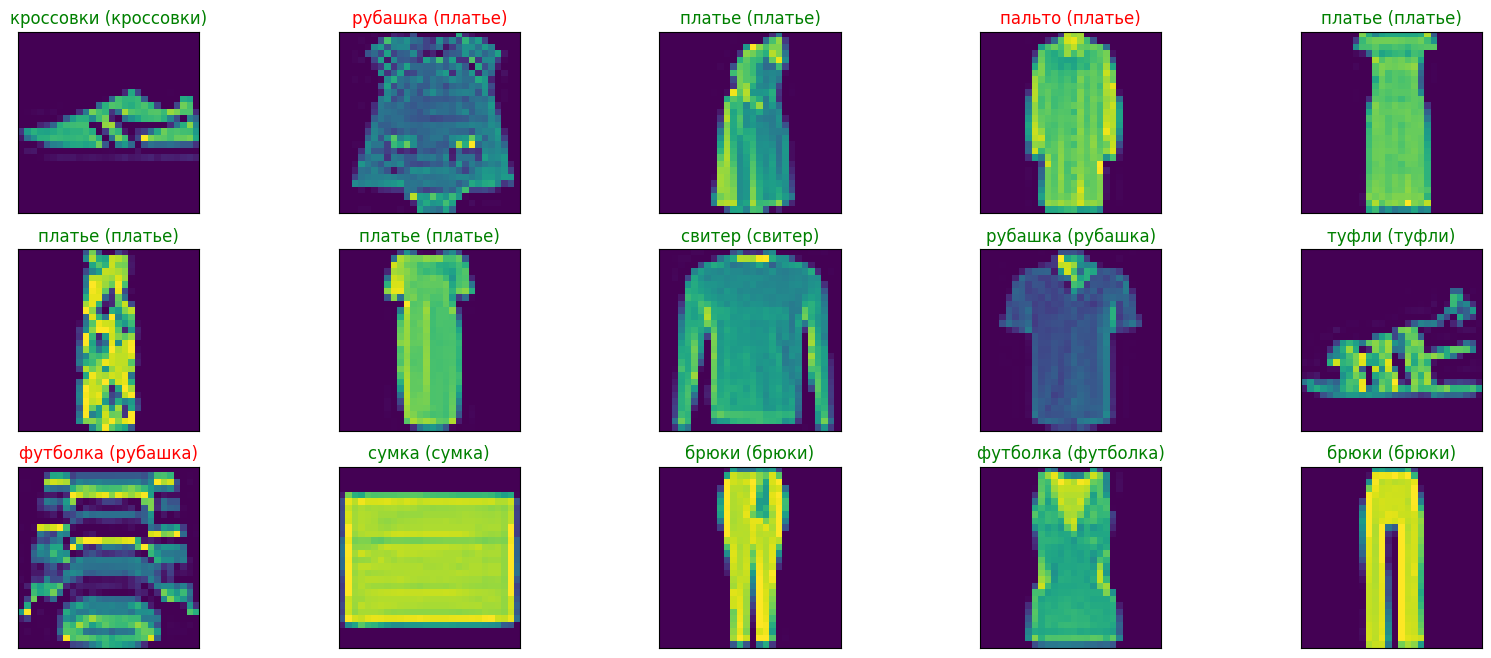

In [76]:
# візуалізація
y_hat_3 = model_3.predict(x_test_3)

figure_3 = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test_3.shape[0], size=15, replace=False)):
    ax = figure_3.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(x_test_2[index]))
    predict_index = np.argmax(y_hat_2[index])
    true_index = np.argmax(y_test_2[index])

    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Висновок: Дана модель не така схильна до перенавчання в порівнянні із модель-2.  При перевірці на тестових даних помилки виникають на схожих зображеннях.